# **Estimation de la Demande Immobilière**

### **1. Compréhension des Données**

In [4]:
pip install missingno

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [6]:
dep = pd.read_csv('dep_paris.csv', low_memory=False)

In [7]:
dep['nombre_de_transactions'] = 1

* **Aperçu des données**

In [8]:
dep.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,nombre_de_transactions
0,2023-1295218,2023-01-03,1,Vente,1825000.00,89.0,NaN,RUE SAINT-DENIS,8525,75001.0,...,165.0,0.0,NaN,NaN,NaN,NaN,NaN,2.349112,48.862083,1
1,2023-1295219,2023-01-05,1,Vente,567000.00,51.0,NaN,RUE DE L ECHIQUIER,3084,75010.0,...,52.0,0.0,NaN,NaN,NaN,NaN,NaN,2.348283,48.871818,1
2,2023-1295220,2023-01-04,1,Vente,140000.00,178.0,NaN,RUE DE COURCELLES,2387,75017.0,...,18.0,1.0,NaN,NaN,NaN,NaN,NaN,2.298612,48.884255,1
3,2023-1295221,2023-01-05,1,Vente,400000.00,12.0,NaN,RUE TURGOT,9508,75009.0,...,43.0,1.0,NaN,NaN,NaN,NaN,NaN,2.345859,48.880564,1
4,2023-1295222,2023-01-04,1,Vente,141343.12,63.0,B,RUE DAMREMONT,2534,75018.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.334615,48.891525,1


* **Compréhension des données**

In [9]:
dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80420 entries, 0 to 80419
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   80420 non-null  object 
 1   date_mutation                 80420 non-null  object 
 2   numero_disposition            80420 non-null  int64  
 3   nature_mutation               80420 non-null  object 
 4   valeur_fonciere               79857 non-null  float64
 5   adresse_numero                80215 non-null  float64
 6   adresse_suffixe               3436 non-null   object 
 7   adresse_nom_voie              80220 non-null  object 
 8   adresse_code_voie             80220 non-null  object 
 9   code_postal                   80218 non-null  float64
 10  code_commune                  80420 non-null  int64  
 11  nom_commune                   80420 non-null  object 
 12  code_departement              80420 non-null  int64  
 13  a

In [10]:
dep.describe()

,numero_disposition,valeur_fonciere,adresse_numero,code_postal,code_commune,code_departement,ancien_code_commune,ancien_nom_commune,ancien_id_parcelle,numero_volume,...,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,nombre_de_transactions
count,80420.000000,7.985700e+04,80215.000000,80218.000000,80420.000000,80420.0,0.0,0.0,0.0,4.040000e+02,...,80420.000000,79616.000000,40164.000000,79609.000000,0.0,0.0,6868.000000,80408.000000,80408.000000,80420.0
mean,1.007150,4.275961e+06,57.403665,75013.144294,75113.140239,75.0,NaN,NaN,NaN,1.624191e+04,...,1.461863,2.619222,63.715940,1.050434,NaN,NaN,1263.746797,2.339273,48.861032,1.0
std,0.088572,2.896828e+07,277.612274,4.809132,4.812278,0.0,NaN,NaN,NaN,8.625587e+04,...,1.120158,0.605428,158.988478,1.467313,NaN,NaN,1593.414897,0.038056,0.019926,0.0
min,1.000000,1.500000e-01,1.000000,75001.000000,75101.000000,75.0,NaN,NaN,NaN,1.000000e+00,...,0.000000,1.000000,1.000000,0.000000,NaN,NaN,1.000000,2.255896,48.818759,1.0
25%,1.000000,2.500000e+05,11.000000,75010.000000,75110.000000,75.0,NaN,NaN,NaN,8.750000e+00,...,1.000000,2.000000,27.000000,0.000000,NaN,NaN,256.000000,2.307782,48.844689,1.0
50%,1.000000,4.922150e+05,28.000000,75014.000000,75114.000000,75.0,NaN,NaN,NaN,2.030000e+02,...,1.000000,3.000000,43.000000,0.000000,NaN,NaN,577.000000,2.340734,48.860916,1.0
75%,1.000000,1.080000e+06,67.000000,75017.000000,75117.000000,75.0,NaN,NaN,NaN,2.310925e+04,...,2.000000,3.000000,70.000000,2.000000,NaN,NaN,1530.000000,2.370769,48.878562,1.0
max,4.000000,7.620000e+08,9050.000000,75020.000000,75120.000000,75.0,NaN,NaN,NaN,1.000084e+06,...,125.000000,4.000000,10099.000000,20.000000,NaN,NaN,20523.000000,2.412283,48.900565,1.0


### **2. Préparation et nettoyage des données**

*   **Visualisation des valeurs manquantes**

<Axes: >

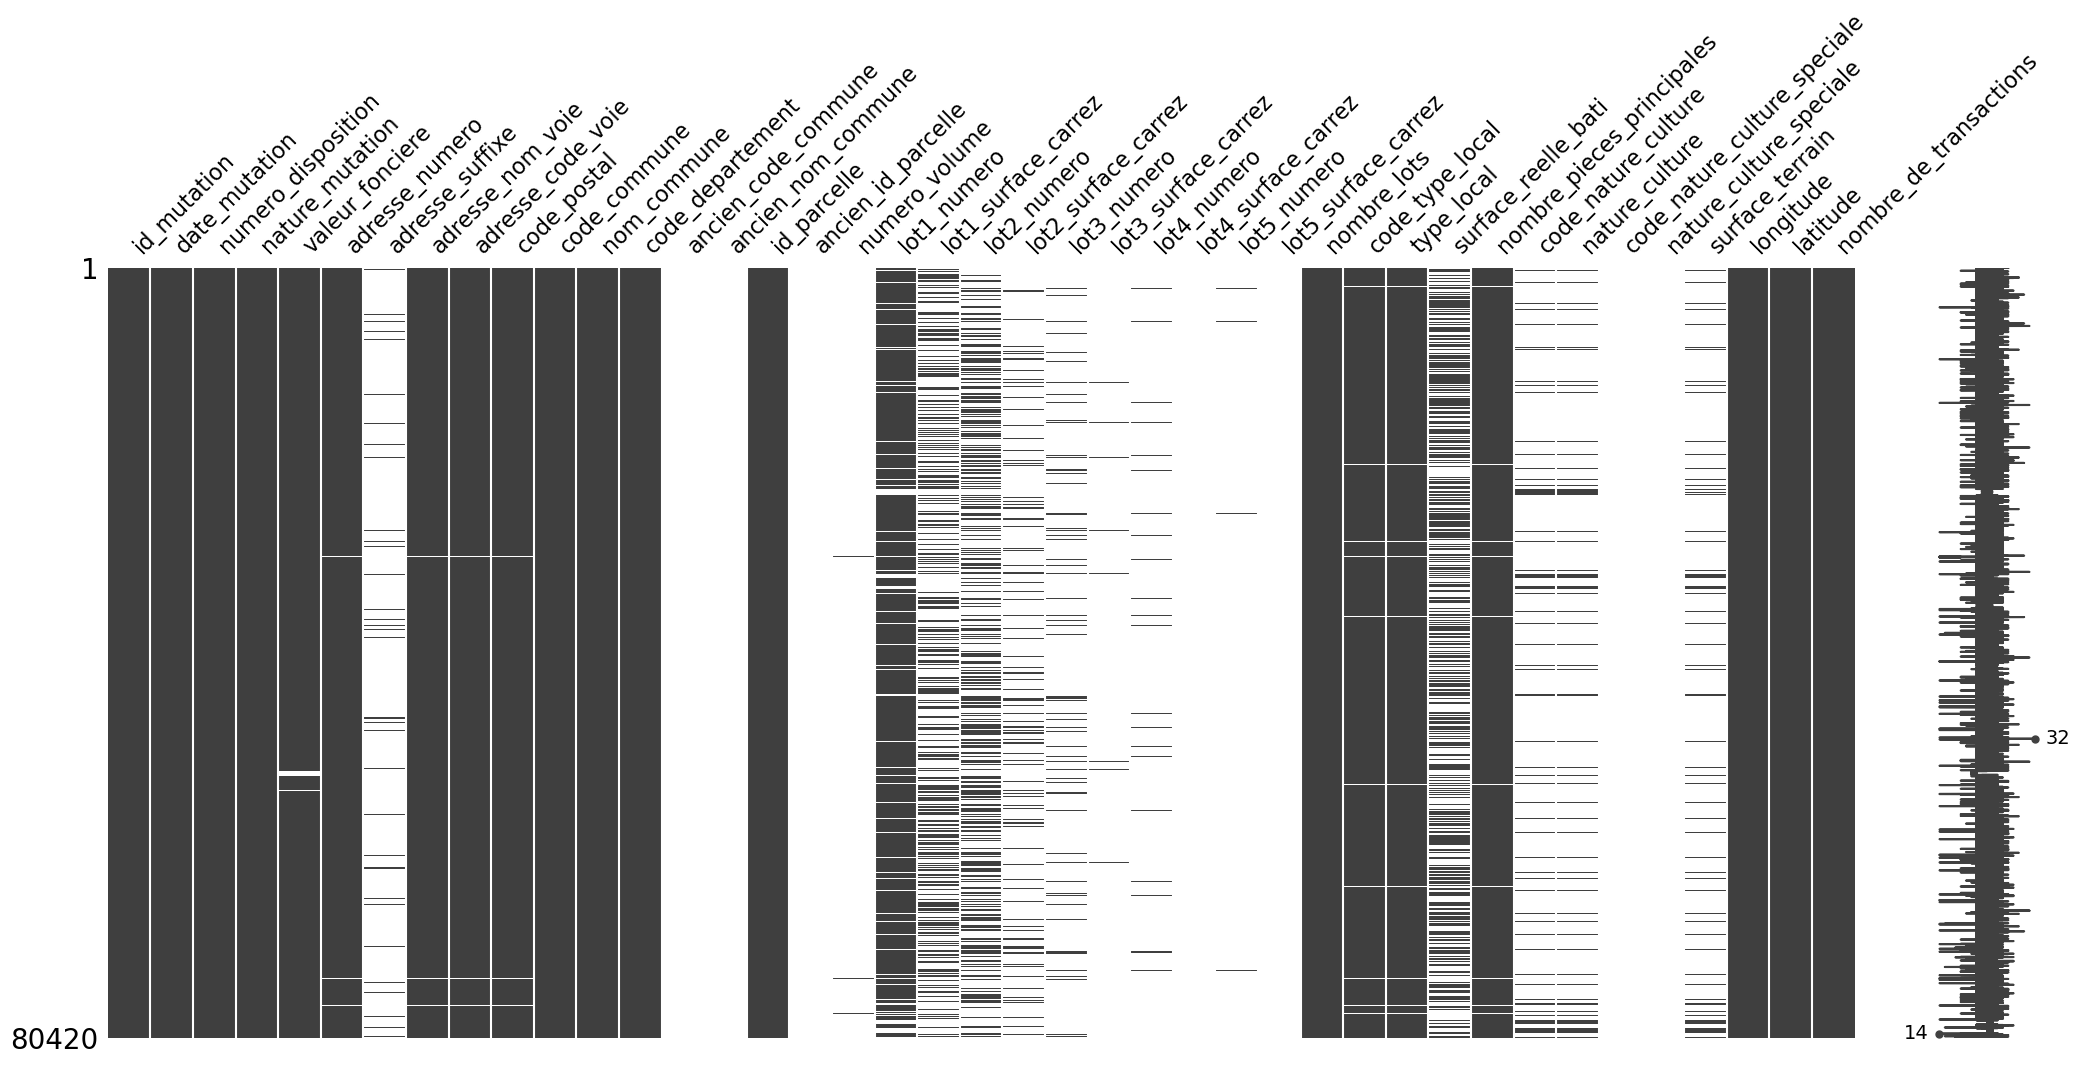

In [11]:
msno.matrix(dep)

* **Suppression des colonnes n'ayant aucune valeurs de renseignées**

In [12]:
missing_values = dep.isnull().all()
dep = dep.drop(columns=missing_values[missing_values].index)

In [13]:
dep.shape

(80420, 36)

* **Filtrer les observations par rapport à la vente**

In [14]:
dep = dep[dep['nature_mutation'] == 'Vente']

* **Supression des lignes n'ayant pas de valeurs foncieres**


In [15]:
(dep['valeur_fonciere'].isnull().sum())/dep.shape[0]

0.007076810515560153

In [16]:
dep = dep[~dep['valeur_fonciere'].isnull()]

* **Supression des valeurs dupliquées**

In [17]:
dep[dep.duplicated(keep=False)]

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude,nombre_de_transactions
9,2023-1295226,2023-01-03,1,Vente,1700.0,214.0,NaN,RUE DU FBG ST MARTIN,3522,75010.0,...,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,2.364393,48.879640,1
10,2023-1295226,2023-01-03,1,Vente,1700.0,214.0,NaN,RUE DU FBG ST MARTIN,3522,75010.0,...,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,2.364393,48.879640,1
11,2023-1295226,2023-01-03,1,Vente,1700.0,214.0,NaN,RUE DU FBG ST MARTIN,3522,75010.0,...,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,2.364393,48.879640,1
64,2023-1295259,2023-01-03,1,Vente,405000.0,102.0,NaN,BD ROCHECHOUART,8288,75018.0,...,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,2.341380,48.882605,1
66,2023-1295259,2023-01-03,1,Vente,405000.0,102.0,NaN,BD ROCHECHOUART,8288,75018.0,...,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,2.341380,48.882605,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80354,2023-1334338,2023-12-15,1,Vente,47000000.0,3.0,NaN,RUE CASSETTE,1591,75006.0,...,3.0,Dépendance,NaN,0.0,S,sols,625.0,2.331090,48.850625,1
80355,2023-1334338,2023-12-15,1,Vente,47000000.0,3.0,NaN,RUE CASSETTE,1591,75006.0,...,3.0,Dépendance,NaN,0.0,S,sols,625.0,2.331090,48.850625,1
80356,2023-1334338,2023-12-15,1,Vente,47000000.0,3.0,NaN,RUE CASSETTE,1591,75006.0,...,3.0,Dépendance,NaN,0.0,S,sols,625.0,2.331090,48.850625,1
80357,2023-1334338,2023-12-15,1,Vente,47000000.0,3.0,NaN,RUE CASSETTE,1591,75006.0,...,3.0,Dépendance,NaN,0.0,S,sols,625.0,2.331090,48.850625,1


In [18]:
dep = dep.drop_duplicates(keep=False)

In [19]:
dep.shape

(67888, 36)

In [20]:
dep[dep.duplicated(keep=False)]

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude,nombre_de_transactions


In [21]:
dep.tail(10)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude,nombre_de_transactions
80392,2023-1334354,2023-12-29,1,Vente,530000.0,2.0,NaN,RUE ALPHONSE DAUDET,0233,75014.0,...,4.0,Local industriel. commercial ou assimilé,100.0,0.0,NaN,NaN,NaN,2.328819,48.826337,1
80395,2023-1334356,2023-12-19,1,Vente,290000.0,117.0,NaN,RUE DU CHERCHE-MIDI,1978,75006.0,...,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,2.319921,48.845757,1
80396,2023-1334356,2023-12-19,1,Vente,290000.0,117.0,NaN,RUE DU CHERCHE-MIDI,1978,75006.0,...,2.0,Appartement,26.0,2.0,NaN,NaN,NaN,2.319921,48.845757,1
80402,2023-1334359,2023-10-30,1,Vente,303000.0,32.0,NaN,BD EXELMANS,3465,75016.0,...,2.0,Appartement,33.0,2.0,NaN,NaN,NaN,2.264614,48.841452,1
80403,2023-1334359,2023-10-30,1,Vente,303000.0,32.0,NaN,BD EXELMANS,3465,75016.0,...,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,2.264614,48.841452,1
80404,2023-1334360,2023-10-26,1,Vente,258070.0,6.0,NaN,RUE FELIX FAURE,3555,75015.0,...,2.0,Appartement,20.0,1.0,NaN,NaN,NaN,2.284440,48.839126,1
80405,2023-1334360,2023-10-26,1,Vente,258070.0,6.0,NaN,RUE FELIX FAURE,3555,75015.0,...,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,2.284440,48.839126,1
80406,2023-1334360,2023-10-26,1,Vente,258070.0,6.0,NaN,RUE FELIX FAURE,3555,75015.0,...,2.0,Appartement,95.0,4.0,NaN,NaN,NaN,2.284440,48.839126,1
80418,2023-1334366,2023-12-28,1,Vente,98250.0,66.0,B,RUE SEBASTIEN MERCIER,8892,75015.0,...,3.0,Dépendance,NaN,0.0,NaN,NaN,NaN,2.280893,48.843264,1
80419,2023-1334366,2023-12-28,1,Vente,98250.0,66.0,B,RUE SEBASTIEN MERCIER,8892,75015.0,...,2.0,Appartement,18.0,1.0,NaN,NaN,NaN,2.280893,48.843264,1


In [22]:
dep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67888 entries, 0 to 80419
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_mutation                67888 non-null  object 
 1   date_mutation              67888 non-null  object 
 2   numero_disposition         67888 non-null  int64  
 3   nature_mutation            67888 non-null  object 
 4   valeur_fonciere            67888 non-null  float64
 5   adresse_numero             67740 non-null  float64
 6   adresse_suffixe            2849 non-null   object 
 7   adresse_nom_voie           67745 non-null  object 
 8   adresse_code_voie          67745 non-null  object 
 9   code_postal                67743 non-null  float64
 10  code_commune               67888 non-null  int64  
 11  nom_commune                67888 non-null  object 
 12  code_departement           67888 non-null  int64  
 13  id_parcelle                67888 non-null  object 


* **Division des attributs en données numériques et catégorielles**

In [23]:
numerical_features = dep.select_dtypes(include=['int64', 'float64'])
categorical_features = dep.select_dtypes(include=['object'])

### **2.1.  Traitement des données numériques**

Dans cette partie, nous allons calculer le pourcentage de valeurs manquantes et par la suite conserver que ceux qui ont une de 30% maximum comme données manquantes dans le but de permettre de les imputer et donc trop biaiser les résultats.

In [24]:
missing_values_num = numerical_features.isnull().sum()
missing_percentage_num = (missing_values_num/len(dep))*100
missing_table_num = pd.DataFrame({'Missing values': missing_values_num, 'Percentage': missing_percentage_num}, index=numerical_features.columns)
missing_table_num

,Missing values,Percentage
numero_disposition,0,0.000000
valeur_fonciere,0,0.000000
adresse_numero,148,0.218006
code_postal,145,0.213587
code_commune,0,0.000000
code_departement,0,0.000000
numero_volume,67508,99.440255
lot1_surface_carrez,41096,60.534999
lot2_surface_carrez,59890,88.218831
lot3_numero,63582,93.657200


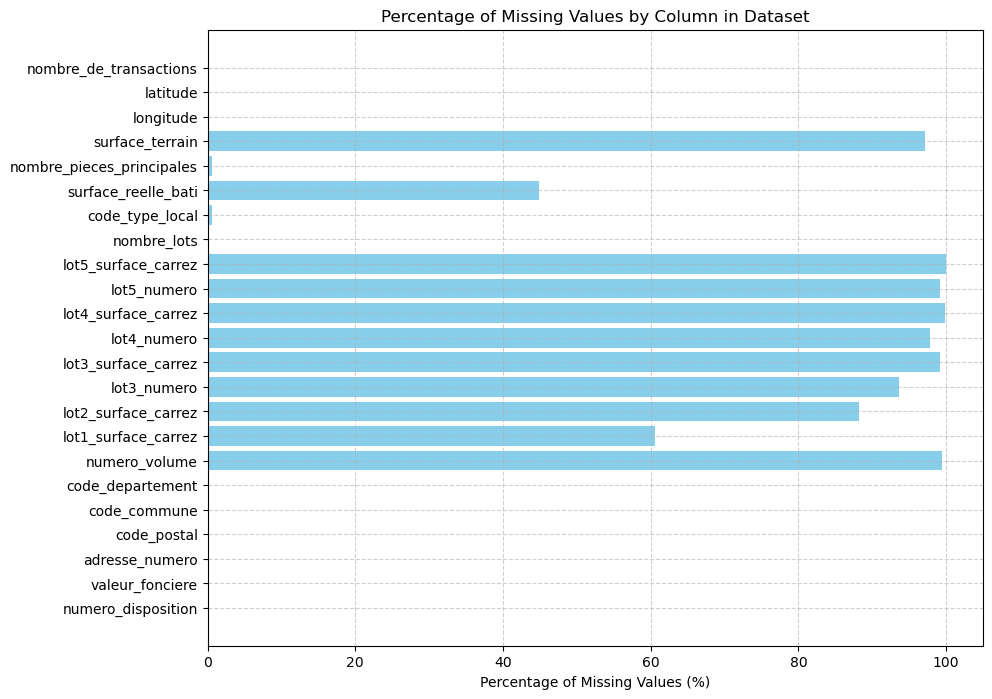

In [25]:
# Plot
plt.figure(figsize=(10, 8))
plt.barh(list(missing_table_num.index), missing_table_num['Percentage'], color='skyblue')
plt.xlabel('Percentage of Missing Values (%)')
plt.title('Percentage of Missing Values by Column in Dataset')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

* **Trie des données numériques à conserver**

Nous allons nous focaliser sur les données ayant un pourcentage de valeurs manquantes **<=30** pour eviter d'avoir des prédictions biaisées.

In [26]:
missing_table_restored_num = missing_table_num[missing_table_num["Percentage"]<=45]
missing_table_restored_num

,Missing values,Percentage
numero_disposition,0,0.000000
valeur_fonciere,0,0.000000
adresse_numero,148,0.218006
code_postal,145,0.213587
code_commune,0,0.000000
code_departement,0,0.000000
nombre_lots,0,0.000000
code_type_local,435,0.640761
surface_reelle_bati,30452,44.856234
nombre_pieces_principales,440,0.648126


* **Reconstitution des données numériques avec ces attributs triés**

In [27]:
numerical_features = numerical_features[[index for index in list(missing_table_restored_num.index)]]
numerical_features.columns

Index(['numero_disposition', 'valeur_fonciere', 'adresse_numero',
       'code_postal', 'code_commune', 'code_departement', 'nombre_lots',
       'code_type_local', 'surface_reelle_bati', 'nombre_pieces_principales',
       'longitude', 'latitude', 'nombre_de_transactions'],
      dtype='object')

* **Test pour voir s'il y'a des valeurs manquantes**

In [28]:
numerical_features.isnull().sum()

numero_disposition               0
valeur_fonciere                  0
adresse_numero                 148
code_postal                    145
code_commune                     0
code_departement                 0
nombre_lots                      0
code_type_local                435
surface_reelle_bati          30452
nombre_pieces_principales      440
longitude                       12
latitude                        12
nombre_de_transactions           0
dtype: int64

In [29]:
numerical_features = numerical_features.drop(columns=["latitude", "longitude", 'code_departement'], axis=1)

* **Imputation des données manquantes**

Nous disposons de différents types d'imputation (mean, median, KNN). Et pour ce faire, nous avons imputer pour le KNN qui est plus réaliste. Car, l'utilisation de la moyenne peut biaiser les prédictions du fait de la nature éparpillés des valeurs numériques.

In [30]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

In [31]:
data_imputed = imputer.fit_transform(numerical_features)

In [32]:
numerical_features = pd.DataFrame(data_imputed, columns=numerical_features.columns)

* **Vérification que l'imputation a été faite**

In [33]:
missing_values_num = numerical_features.isnull().sum()
missing_percentage_num = (missing_values_num/len(dep))*100
missing_table_num = pd.DataFrame({'Missing values': missing_values_num, 'Percentage': missing_percentage_num}, index=numerical_features.columns)
missing_table_num

,Missing values,Percentage
numero_disposition,0,0.0
valeur_fonciere,0,0.0
adresse_numero,0,0.0
code_postal,0,0.0
code_commune,0,0.0
nombre_lots,0,0.0
code_type_local,0,0.0
surface_reelle_bati,0,0.0
nombre_pieces_principales,0,0.0
nombre_de_transactions,0,0.0


In [34]:
numerical_features.shape

(67888, 10)

* **Vérification de la cohérence des données**

In [35]:
numerical_features.head(10)

,numero_disposition,valeur_fonciere,adresse_numero,code_postal,code_commune,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,nombre_de_transactions
0,1.0,1825000.00,89.0,75001.0,75101.0,7.0,4.0,165.000000,0.0,1.0
1,1.0,567000.00,51.0,75010.0,75110.0,2.0,4.0,52.000000,0.0,1.0
2,1.0,140000.00,178.0,75017.0,75117.0,2.0,2.0,18.000000,1.0,1.0
3,1.0,400000.00,12.0,75009.0,75109.0,1.0,2.0,43.000000,1.0,1.0
4,1.0,141343.12,63.0,75018.0,75118.0,1.0,3.0,14.333333,0.0,1.0
5,1.0,295000.00,18.0,75017.0,75117.0,2.0,2.0,28.000000,2.0,1.0
6,1.0,300400.00,75.0,75018.0,75118.0,2.0,3.0,35.000000,0.0,1.0
7,1.0,300400.00,75.0,75018.0,75118.0,2.0,2.0,36.000000,2.0,1.0
8,1.0,17300.00,121.0,75019.0,75119.0,1.0,3.0,24.333333,0.0,1.0
9,1.0,213000.00,8.0,75018.0,75118.0,2.0,2.0,27.000000,1.0,1.0


### **2.2.  Traitement des données catégorielles**

In [36]:
missing_values_cat = categorical_features.isnull().sum()
missing_percentage_cat = (missing_values_cat/len(dep))*100
missing_table_cat = pd.DataFrame({'Missing values': missing_values_cat, 'Percentage': missing_percentage_cat}, index=categorical_features.columns)
missing_table_cat

,Missing values,Percentage
id_mutation,0,0.000000
date_mutation,0,0.000000
nature_mutation,0,0.000000
adresse_suffixe,65039,95.803382
adresse_nom_voie,143,0.210641
adresse_code_voie,143,0.210641
nom_commune,0,0.000000
id_parcelle,0,0.000000
lot1_numero,2358,3.473368
lot2_numero,37439,55.148185


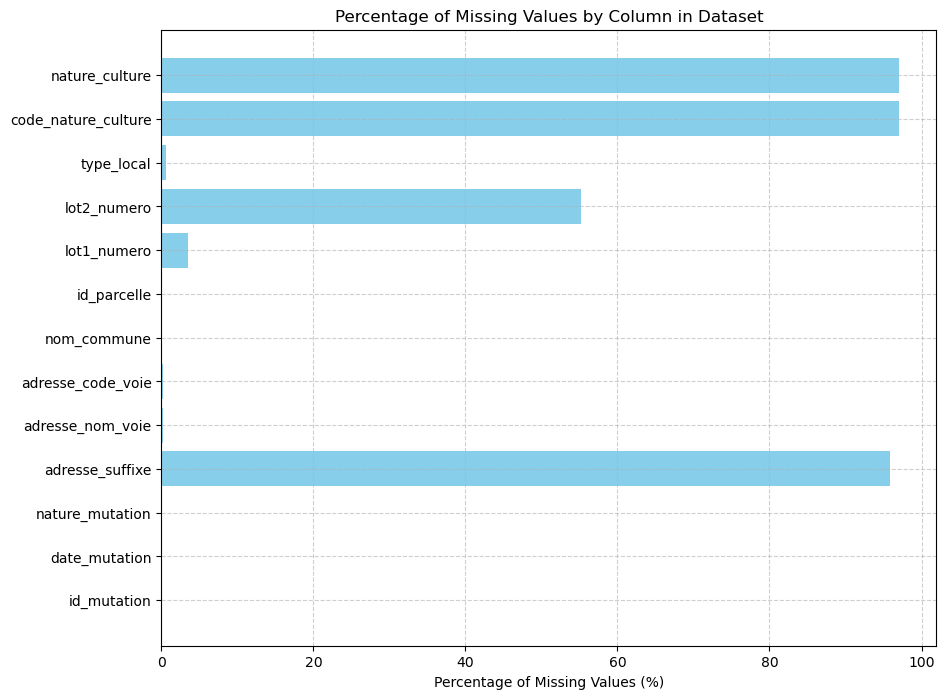

In [37]:
# Plot
plt.figure(figsize=(10, 8))
plt.barh(list(missing_table_cat.index), missing_table_cat['Percentage'], color='skyblue')
plt.xlabel('Percentage of Missing Values (%)')
plt.title('Percentage of Missing Values by Column in Dataset')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

* **Mis à jour des données à conserver**

In [38]:
missing_table_restored_cat = missing_table_cat[missing_table_cat["Percentage"]<=30]
columns_saved = list(missing_table_restored_cat.index)
columns_saved.pop(7)
missing_table_restored_cat

,Missing values,Percentage
id_mutation,0,0.000000
date_mutation,0,0.000000
nature_mutation,0,0.000000
adresse_nom_voie,143,0.210641
adresse_code_voie,143,0.210641
nom_commune,0,0.000000
id_parcelle,0,0.000000
lot1_numero,2358,3.473368
type_local,435,0.640761


In [39]:
categorical_features = categorical_features.drop(columns=['lot1_numero'])
categorical_features.columns

Index(['id_mutation', 'date_mutation', 'nature_mutation', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'nom_commune', 'id_parcelle',
       'lot2_numero', 'type_local', 'code_nature_culture', 'nature_culture'],
      dtype='object')

In [40]:
categorical_features = categorical_features[[index for index in columns_saved]]
categorical_features.shape

(67888, 8)

In [41]:
categorical_features.head(10)

,id_mutation,date_mutation,nature_mutation,adresse_nom_voie,adresse_code_voie,nom_commune,id_parcelle,type_local
0,2023-1295218,2023-01-03,Vente,RUE SAINT-DENIS,8525,Paris 1er Arrondissement,75101000AP0050,Local industriel. commercial ou assimilé
1,2023-1295219,2023-01-05,Vente,RUE DE L ECHIQUIER,3084,Paris 10e Arrondissement,75110000AV0075,Local industriel. commercial ou assimilé
2,2023-1295220,2023-01-04,Vente,RUE DE COURCELLES,2387,Paris 17e Arrondissement,75117000BG0053,Appartement
3,2023-1295221,2023-01-05,Vente,RUE TURGOT,9508,Paris 9e Arrondissement,75109000BD0036,Appartement
4,2023-1295222,2023-01-04,Vente,RUE DAMREMONT,2534,Paris 18e Arrondissement,75118000AK0014,Dépendance
5,2023-1295223,2023-01-03,Vente,RUE EMILE LEVEL,3246,Paris 17e Arrondissement,75117000DG0040,Appartement
6,2023-1295224,2023-01-03,Vente,BD BARBES,0662,Paris 18e Arrondissement,75118000BV0098,Dépendance
7,2023-1295224,2023-01-03,Vente,BD BARBES,0662,Paris 18e Arrondissement,75118000BV0098,Appartement
8,2023-1295225,2023-01-02,Vente,RUE MANIN,5976,Paris 19e Arrondissement,75119000CW0014,Dépendance
12,2023-1295227,2023-01-04,Vente,RUE BOUCRY,1139,Paris 18e Arrondissement,75118000CW0057,Appartement


* **vérification des valeurs manquantes**

In [42]:
categorical_features.isnull().sum()

id_mutation            0
date_mutation          0
nature_mutation        0
adresse_nom_voie     143
adresse_code_voie    143
nom_commune            0
id_parcelle            0
type_local           435
dtype: int64

* **Suppression des colonnes 'adresse_code_voie' & 'id_mutation'**

Ces informations sont déjà relatés par d'autres variables.

In [43]:
categorical_features = categorical_features.drop(columns=['id_mutation','adresse_code_voie'])
categorical_features.columns

Index(['date_mutation', 'nature_mutation', 'adresse_nom_voie', 'nom_commune',
       'id_parcelle', 'type_local'],
      dtype='object')

In [44]:
categorical_features.shape

(67888, 6)

In [45]:
missing_values_cat = categorical_features.isnull().sum()
missing_percentage_cat = (missing_values_cat/len(dep))*100
missing_table_cat = pd.DataFrame({'Missing values': missing_values_cat, 'Percentage': missing_percentage_cat}, index=categorical_features.columns)
missing_table_cat

,Missing values,Percentage
date_mutation,0,0.000000
nature_mutation,0,0.000000
adresse_nom_voie,143,0.210641
nom_commune,0,0.000000
id_parcelle,0,0.000000
type_local,435,0.640761


* **Reconstitution des données catégorielles avec ces attributs triés**


In [46]:
categorical_features = categorical_features[[index for index in list(missing_table_cat.index)]]
categorical_features.shape

(67888, 6)

* **Imputer les données par le mode la série**

In [47]:
for column in list(categorical_features.columns):
    # Calculez la mode de la colonne - la mode() retourne une série, donc prenez le premier élément si la mode existe
    mode_value = categorical_features[column].mode()[0] if not categorical_features[column].mode().empty else None
    print(f"mode_value [{column}]: {mode_value}")
    # Remplissez les valeurs manquantes avec la mode
    if mode_value is not None:
        categorical_features[column] = categorical_features[column].fillna(mode_value)
    else:
        print(f"No mode found for {column}. Column may be entirely NaN or needs a default fill value.")

mode_value [date_mutation]: 2023-06-30
mode_value [nature_mutation]: Vente
mode_value [adresse_nom_voie]: RUE DE LA TOMBE ISSOIRE
mode_value [nom_commune]: Paris 15e Arrondissement
mode_value [id_parcelle]: 75114000BM0147
mode_value [type_local]: Appartement


In [48]:
missing_values_cat = categorical_features.isnull().sum()
missing_percentage_cat = (missing_values_cat/len(dep))*100
missing_table_cat = pd.DataFrame({'Missing values': missing_values_cat, 'Percentage': missing_percentage_cat}, index=categorical_features.columns)
missing_table_cat

,Missing values,Percentage
date_mutation,0,0.0
nature_mutation,0,0.0
adresse_nom_voie,0,0.0
nom_commune,0,0.0
id_parcelle,0,0.0
type_local,0,0.0


In [49]:
categorical_features.head()

,date_mutation,nature_mutation,adresse_nom_voie,nom_commune,id_parcelle,type_local
0,2023-01-03,Vente,RUE SAINT-DENIS,Paris 1er Arrondissement,75101000AP0050,Local industriel. commercial ou assimilé
1,2023-01-05,Vente,RUE DE L ECHIQUIER,Paris 10e Arrondissement,75110000AV0075,Local industriel. commercial ou assimilé
2,2023-01-04,Vente,RUE DE COURCELLES,Paris 17e Arrondissement,75117000BG0053,Appartement
3,2023-01-05,Vente,RUE TURGOT,Paris 9e Arrondissement,75109000BD0036,Appartement
4,2023-01-04,Vente,RUE DAMREMONT,Paris 18e Arrondissement,75118000AK0014,Dépendance


* **Conversion de types de données**

In [50]:
categorical_features['date_mutation'] = pd.to_datetime(categorical_features['date_mutation'])
numerical_features['code_postal'] = numerical_features['code_postal'].astype(str)

In [51]:
numerical_features.dtypes

numero_disposition           float64
valeur_fonciere              float64
adresse_numero               float64
code_postal                   object
code_commune                 float64
nombre_lots                  float64
code_type_local              float64
surface_reelle_bati          float64
nombre_pieces_principales    float64
nombre_de_transactions       float64
dtype: object

In [52]:
categorical_features.dtypes

date_mutation       datetime64[ns]
nature_mutation             object
adresse_nom_voie            object
nom_commune                 object
id_parcelle                 object
type_local                  object
dtype: object

* **concatener les deux dataframes**

In [53]:
dep = pd.concat([categorical_features.reset_index(drop=True), numerical_features.reset_index(drop=True)], axis=1)
dep.columns = dep.columns.str.strip()
dep.shape

(67888, 16)

In [54]:
dep.columns

Index(['date_mutation', 'nature_mutation', 'adresse_nom_voie', 'nom_commune',
       'id_parcelle', 'type_local', 'numero_disposition', 'valeur_fonciere',
       'adresse_numero', 'code_postal', 'code_commune', 'nombre_lots',
       'code_type_local', 'surface_reelle_bati', 'nombre_pieces_principales',
       'nombre_de_transactions'],
      dtype='object')

In [55]:
dep = dep.drop(columns=['code_commune'])
dep.columns

Index(['date_mutation', 'nature_mutation', 'adresse_nom_voie', 'nom_commune',
       'id_parcelle', 'type_local', 'numero_disposition', 'valeur_fonciere',
       'adresse_numero', 'code_postal', 'nombre_lots', 'code_type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'nombre_de_transactions'],
      dtype='object')

* **Nouvel aperçu de la dataframe**

In [56]:
dep.head()

,date_mutation,nature_mutation,adresse_nom_voie,nom_commune,id_parcelle,type_local,numero_disposition,valeur_fonciere,adresse_numero,code_postal,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,nombre_de_transactions
0,2023-01-03,Vente,RUE SAINT-DENIS,Paris 1er Arrondissement,75101000AP0050,Local industriel. commercial ou assimilé,1.0,1825000.00,89.0,75001.0,7.0,4.0,165.000000,0.0,1.0
1,2023-01-05,Vente,RUE DE L ECHIQUIER,Paris 10e Arrondissement,75110000AV0075,Local industriel. commercial ou assimilé,1.0,567000.00,51.0,75010.0,2.0,4.0,52.000000,0.0,1.0
2,2023-01-04,Vente,RUE DE COURCELLES,Paris 17e Arrondissement,75117000BG0053,Appartement,1.0,140000.00,178.0,75017.0,2.0,2.0,18.000000,1.0,1.0
3,2023-01-05,Vente,RUE TURGOT,Paris 9e Arrondissement,75109000BD0036,Appartement,1.0,400000.00,12.0,75009.0,1.0,2.0,43.000000,1.0,1.0
4,2023-01-04,Vente,RUE DAMREMONT,Paris 18e Arrondissement,75118000AK0014,Dépendance,1.0,141343.12,63.0,75018.0,1.0,3.0,14.333333,0.0,1.0


In [57]:
dep['code_postal'] = dep['code_postal'].astype(float)
dep.dtypes

date_mutation                datetime64[ns]
nature_mutation                      object
adresse_nom_voie                     object
nom_commune                          object
id_parcelle                          object
type_local                           object
numero_disposition                  float64
valeur_fonciere                     float64
adresse_numero                      float64
code_postal                         float64
nombre_lots                         float64
code_type_local                     float64
surface_reelle_bati                 float64
nombre_pieces_principales           float64
nombre_de_transactions              float64
dtype: object

In [58]:
# Définir la liste des codes postaux incorrects
incorrect_postal_codes = [75009.33333333333, 75013.66666666667, 75011.33333333333,
                          75013.33333333333, 75007.33333333333, 75010.66666666667,
                          75010.33333333333, 75011.66666666667, 75015.33333333333,
                          75012.66666666667]

# Filtrer les codes postaux incorrects
dep['code_postal'] = np.floor(dep["code_postal"])
dep.code_postal.unique()

array([75001., 75010., 75017., 75009., 75018., 75019., 75020., 75008.,
       75003., 75002., 75004., 75014., 75013., 75007., 75006., 75011.,
       75015., 75012., 75016., 75005.])

In [59]:
dep['code_postal'] = dep['code_postal'].astype(str)

In [60]:
dep.dtypes

date_mutation                datetime64[ns]
nature_mutation                      object
adresse_nom_voie                     object
nom_commune                          object
id_parcelle                          object
type_local                           object
numero_disposition                  float64
valeur_fonciere                     float64
adresse_numero                      float64
code_postal                          object
nombre_lots                         float64
code_type_local                     float64
surface_reelle_bati                 float64
nombre_pieces_principales           float64
nombre_de_transactions              float64
dtype: object

## **3. Analyse Exploratoire des données**
### **Analyse des Représentations Graphiques**
Les différentes visualisations fournies donnent un aperçu précieux des tendances et des distributions des transactions immobilières à Paris. Voici ce que nous pouvons déduire de chaque graphique et comment cela peut nous aider à prédire le nombre de transactions par région.

* **Grouper par région**

In [61]:
# Ajouter une colonne pour l'année et le mois
dep['year'] = pd.DatetimeIndex(dep['date_mutation']).year
dep['month'] = pd.DatetimeIndex(dep['date_mutation']).month

In [62]:
cols = list(numerical_features.columns)
cols.pop(0)
cols.pop(1)
cols.pop(1)
cols.pop(1)
cols

['valeur_fonciere',
 'nombre_lots',
 'code_type_local',
 'surface_reelle_bati',
 'nombre_pieces_principales',
 'nombre_de_transactions']

In [63]:
data_univariate = dep[cols]
data_univariate.head(10)

,valeur_fonciere,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,nombre_de_transactions
0,1825000.00,7.0,4.0,165.000000,0.0,1.0
1,567000.00,2.0,4.0,52.000000,0.0,1.0
2,140000.00,2.0,2.0,18.000000,1.0,1.0
3,400000.00,1.0,2.0,43.000000,1.0,1.0
4,141343.12,1.0,3.0,14.333333,0.0,1.0
5,295000.00,2.0,2.0,28.000000,2.0,1.0
6,300400.00,2.0,3.0,35.000000,0.0,1.0
7,300400.00,2.0,2.0,36.000000,2.0,1.0
8,17300.00,1.0,3.0,24.333333,0.0,1.0
9,213000.00,2.0,2.0,27.000000,1.0,1.0


C:\Users\test\AppData\Local\Temp\ipykernel_3892\2773413667.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\test\AppData\Local\Temp\ipykernel_3892\2773413667.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\test\AppData\Local\Temp\ipykernel_3892\2773413667.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\test\AppData\Local\Temp\ipykernel_3892\2773413667.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\test\AppData\Local\Temp\ipykernel_3892\2773413667.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


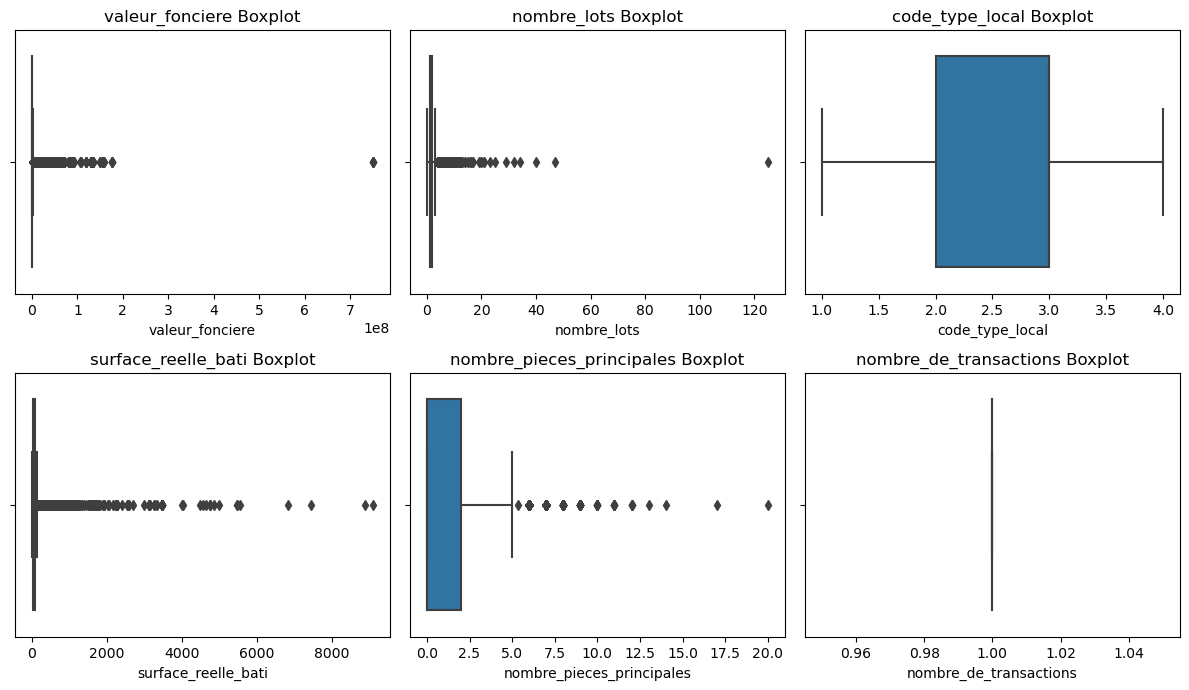

In [64]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,10))
for i, j in enumerate(data_univariate.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=data_univariate[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()
plt.show()

* **Visualisations Univariées et Bivariées**

La majorité des transactions concernent des appartements, suivis par les dépendances et les locaux industriels, commerciaux ou assimilés. Les maisons représentent une très faible proportion des transactions.
Cela indique une forte demande pour les appartements à Paris, ce qui est cohérent avec la densité urbaine et le type de logement dominant dans la ville.

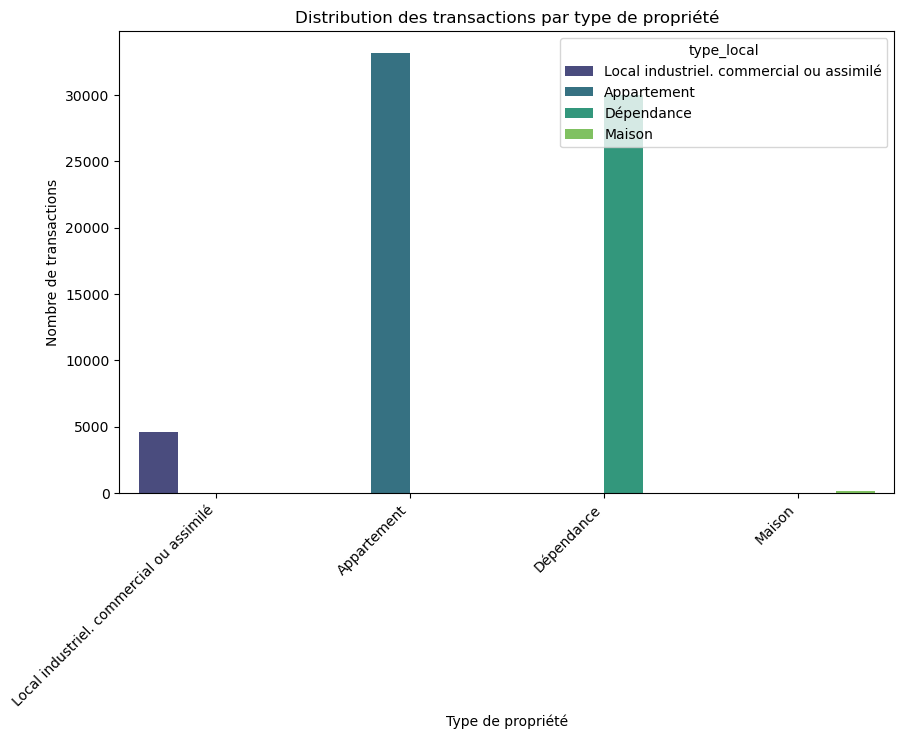

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dep, x='type_local', palette='viridis', hue='type_local')
plt.title('Distribution des transactions par type de propriété')
plt.xlabel('Type de propriété')
plt.ylabel('Nombre de transactions')
# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')
plt.show()

Certaines régions (codes postaux) ont beaucoup plus de transactions que d'autres. Par exemple, les codes postaux 75015, 75016 et 75018 ont le plus grand nombre de transactions.
Cela peut indiquer des zones de forte activité immobilière, peut-être en raison de facteurs comme l'attractivité résidentielle, les commodités disponibles ou les prix immobiliers.
En identifiant les régions avec des volumes de transactions élevés, les modèles peuvent être ajustés pour prévoir une demande plus forte dans ces zones.
Les caractéristiques spécifiques de ces régions (comme la densité de population, les prix moyens des propriétés, etc.) peuvent être intégrées dans les modèles pour améliorer la précision.

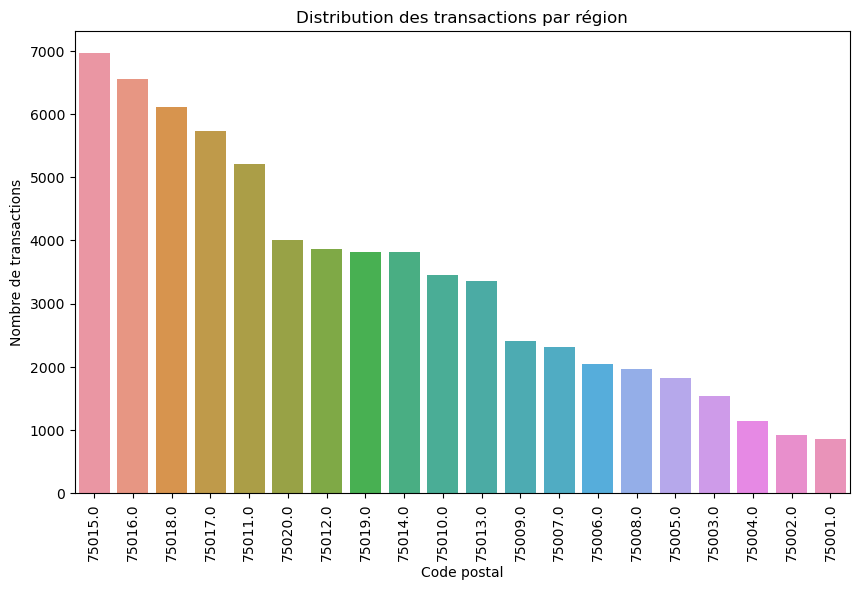

In [67]:
# Distribution des transactions par région (code postal)
plt.figure(figsize=(10, 6))
sns.countplot(data=dep, x='code_postal', order=dep['code_postal'].value_counts().index)
plt.title('Distribution des transactions par région')
plt.xlabel('Code postal')
plt.ylabel('Nombre de transactions')
plt.xticks(rotation=90)
plt.show()

Les transactions sont concentrées dans certains arrondissements, avec Paris 15e, 16e et 18e arrondissements ayant le plus grand nombre de transactions.
Cela montre des zones à forte demande immobilière, souvent liées à des facteurs comme la qualité de vie, l'accès aux transports et les infrastructures locales.

En utilisant ces données, les modèles peuvent être entraînés pour prévoir les transactions par arrondissement. Les caractéristiques démographiques et économiques de chaque arrondissement peuvent être intégrées pour améliorer les prédictions.

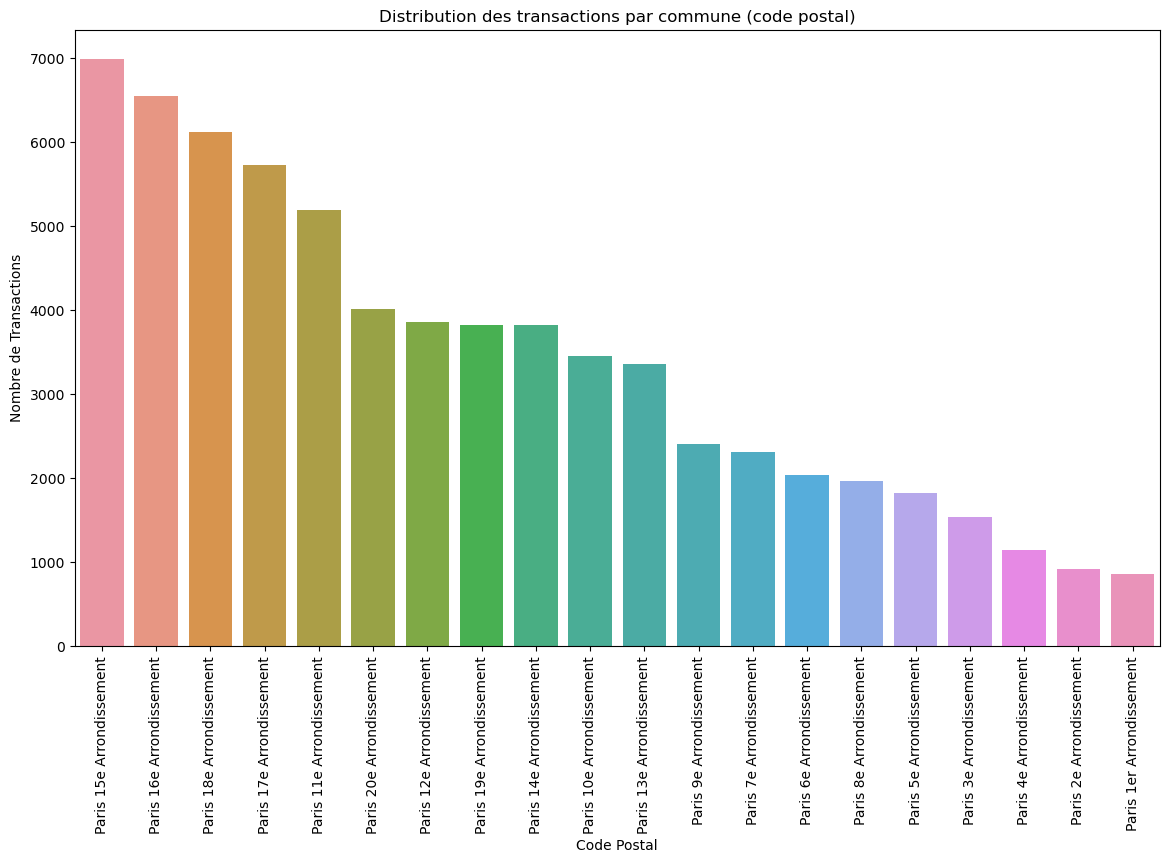

In [68]:
# Regrouper par commune (code postal) et compter les transactions
transactions_by_commune = dep.groupby('nom_commune').agg({'nombre_de_transactions': 'sum'}).reset_index()

# Trier par nombre de transactions
transactions_by_commune = transactions_by_commune.sort_values(by='nombre_de_transactions', ascending=False)

# Visualiser la distribution des transactions par commune
plt.figure(figsize=(14, 8))
sns.barplot(x='nom_commune', y='nombre_de_transactions', data=transactions_by_commune)
plt.title('Distribution des transactions par commune (code postal)')
plt.xlabel('Code Postal')
plt.ylabel('Nombre de Transactions')
plt.xticks(rotation=90)
plt.show()

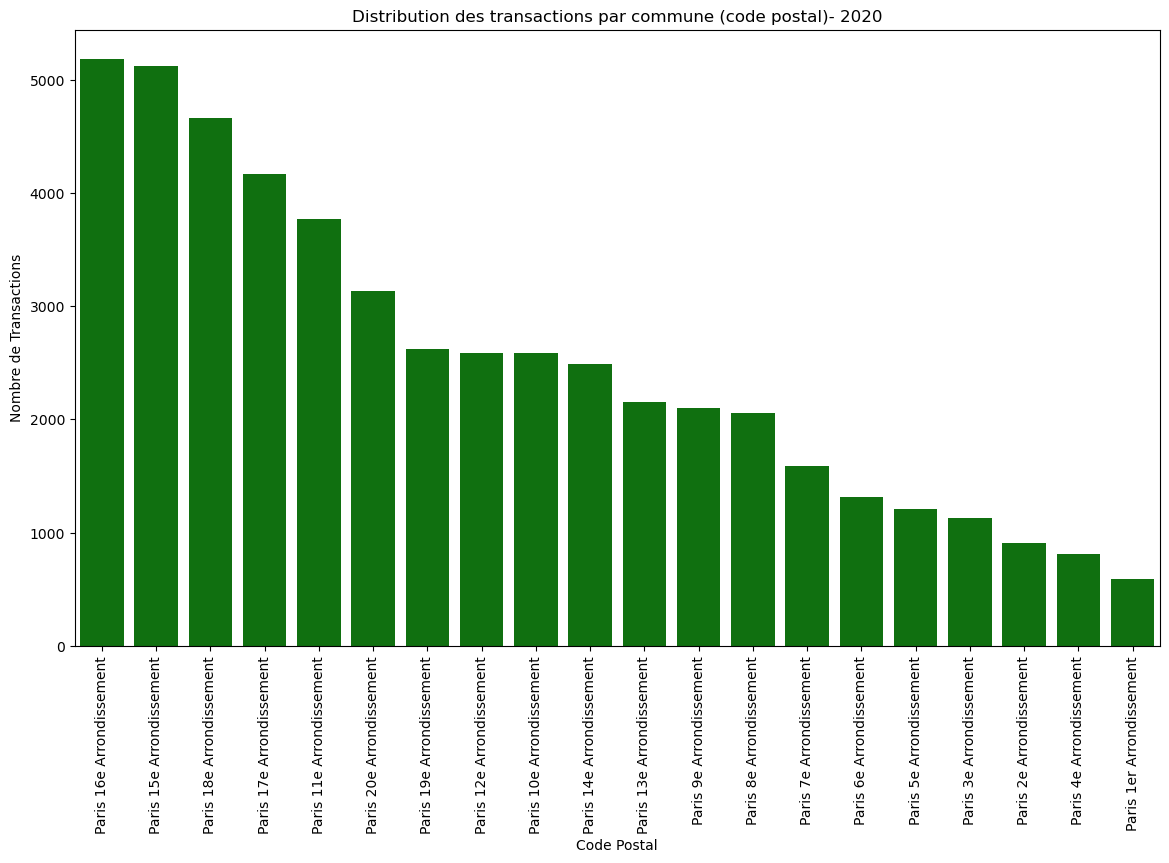

In [69]:
df=pd.read_csv("75_2020_1.csv")
df['year'] = pd.DatetimeIndex(df['date_mutation']).year
df['month'] = pd.DatetimeIndex(df['date_mutation']).month
# Regrouper par commune (code postal) et compter les transactions
transactions_by_commune = df.groupby('nom_commune').agg({'nombre_de_transactions': 'sum'}).reset_index()

# Trier par nombre de transactions
transactions_by_commune = transactions_by_commune.sort_values(by='nombre_de_transactions', ascending=False)

# Visualiser la distribution des transactions par commune
plt.figure(figsize=(14, 8))
sns.barplot(x='nom_commune', y='nombre_de_transactions', data=transactions_by_commune, color='green')
plt.title('Distribution des transactions par commune (code postal)- 2020')
plt.xlabel('Code Postal')
plt.ylabel('Nombre de Transactions')
plt.xticks(rotation=90)
plt.show()

* **Analyse temporelle**

* **Nombre de transaction par mois**

Il y a des variations saisonnières dans le nombre de transactions immobilières, avec des pics en juillet et des creux en août.
Ces variations peuvent être dues à des facteurs saisonniers, comme les vacances d'été ou les périodes de déménagement.

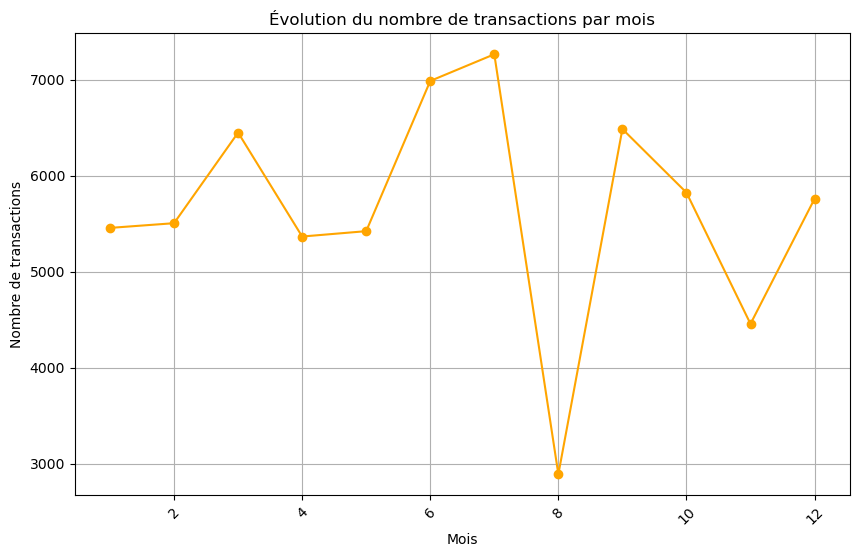

In [70]:
transaction_counts = dep['month'].value_counts().sort_index()
# Création de la courbe d'évolution
plt.figure(figsize=(10, 6))
plt.plot(transaction_counts.index, transaction_counts.values, marker='o', linestyle='-', color='orange')
plt.title('Évolution du nombre de transactions par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de transactions')
plt.grid(True)  # Ajoute une grille pour une meilleure lisibilité
plt.xticks(rotation=45)  # Ajuste la rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.show()

* **Analyse Bivariée**

In [71]:
vf_trans = dep.groupby("code_postal").agg({"valeur_fonciere":"sum", "nombre_de_transactions":"sum"})
vf_trans.shape

(20, 2)

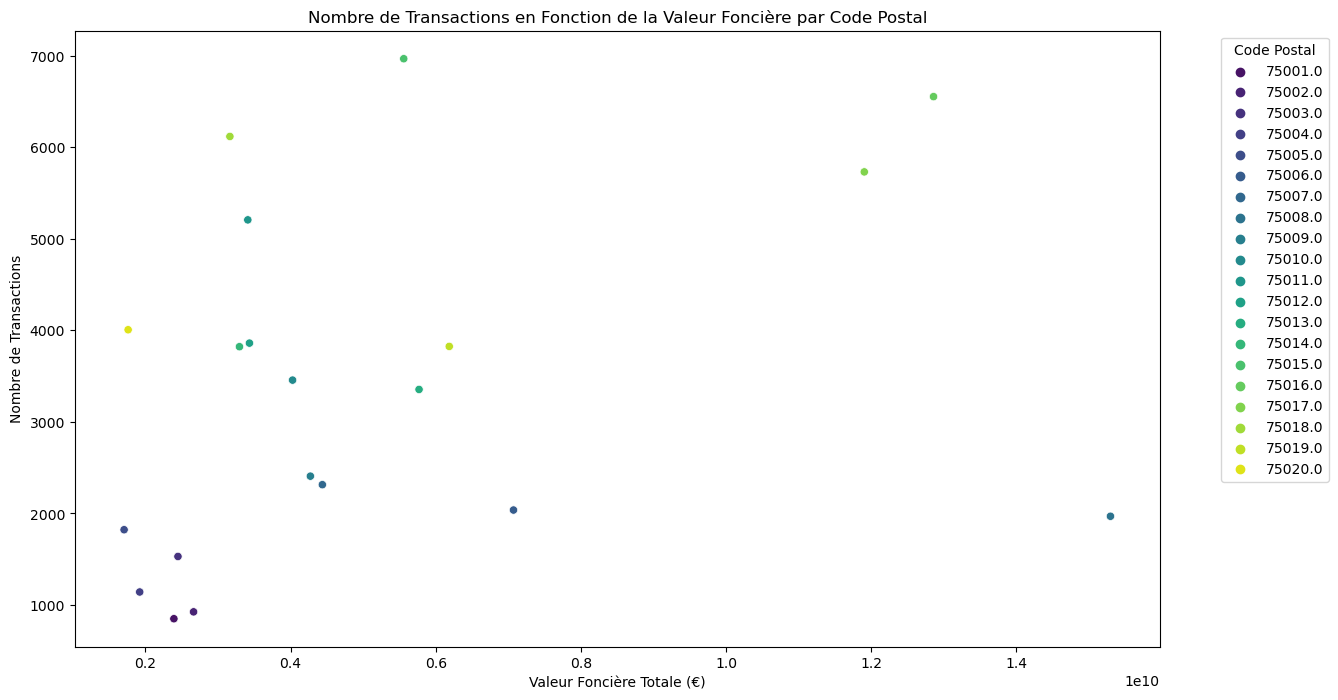

In [72]:
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(data=vf_trans, x='valeur_fonciere', y='nombre_de_transactions', hue='code_postal', palette='viridis')
plt.title('Nombre de Transactions en Fonction de la Valeur Foncière par Code Postal')
plt.xlabel('Valeur Foncière Totale (€)')
plt.ylabel('Nombre de Transactions')
# Ajouter une légende à l'extérieur du graphique
plt.legend(title='Code Postal', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


* **Analyse multiriée**

C:\Users\test\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


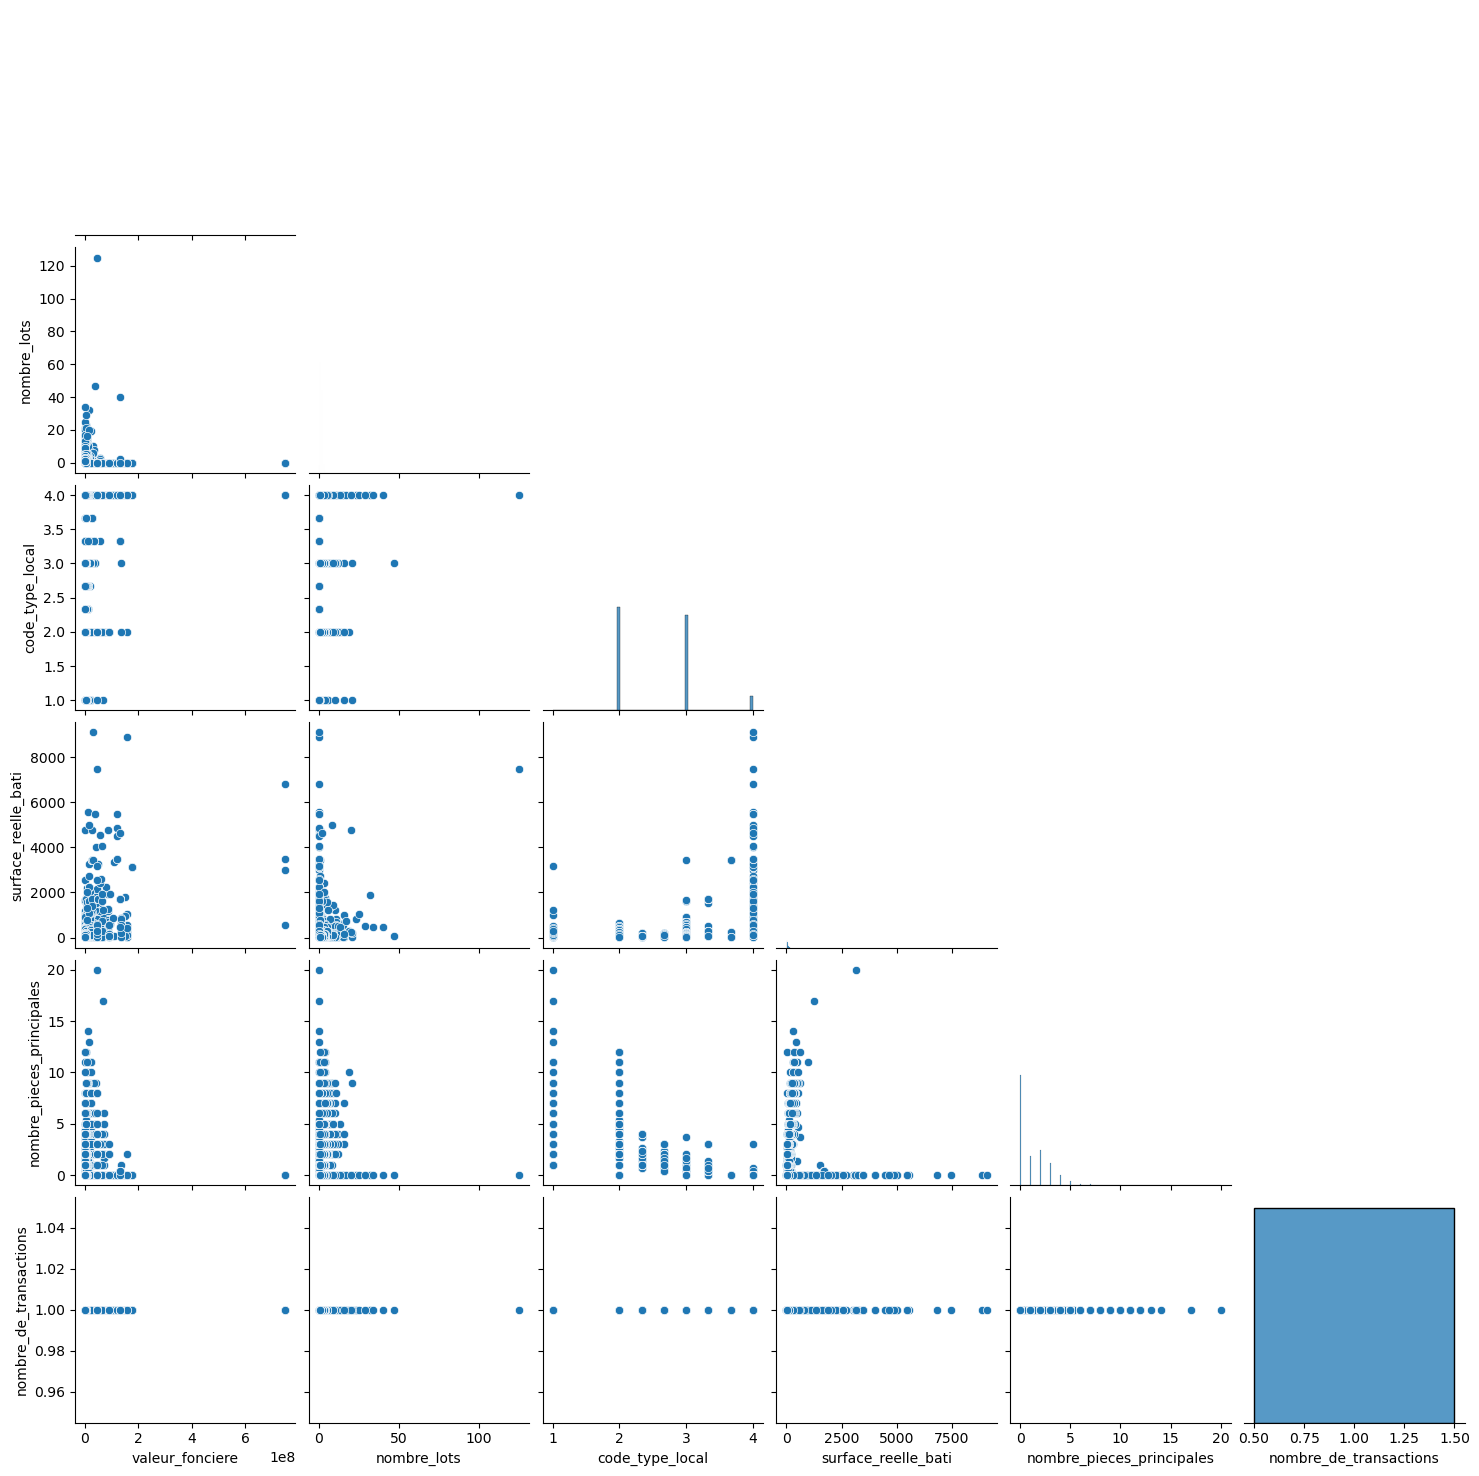

In [73]:
pairplot = sns.pairplot(data_univariate, corner=True)
plt.show(pairplot)

* **Matrice de corrélation**

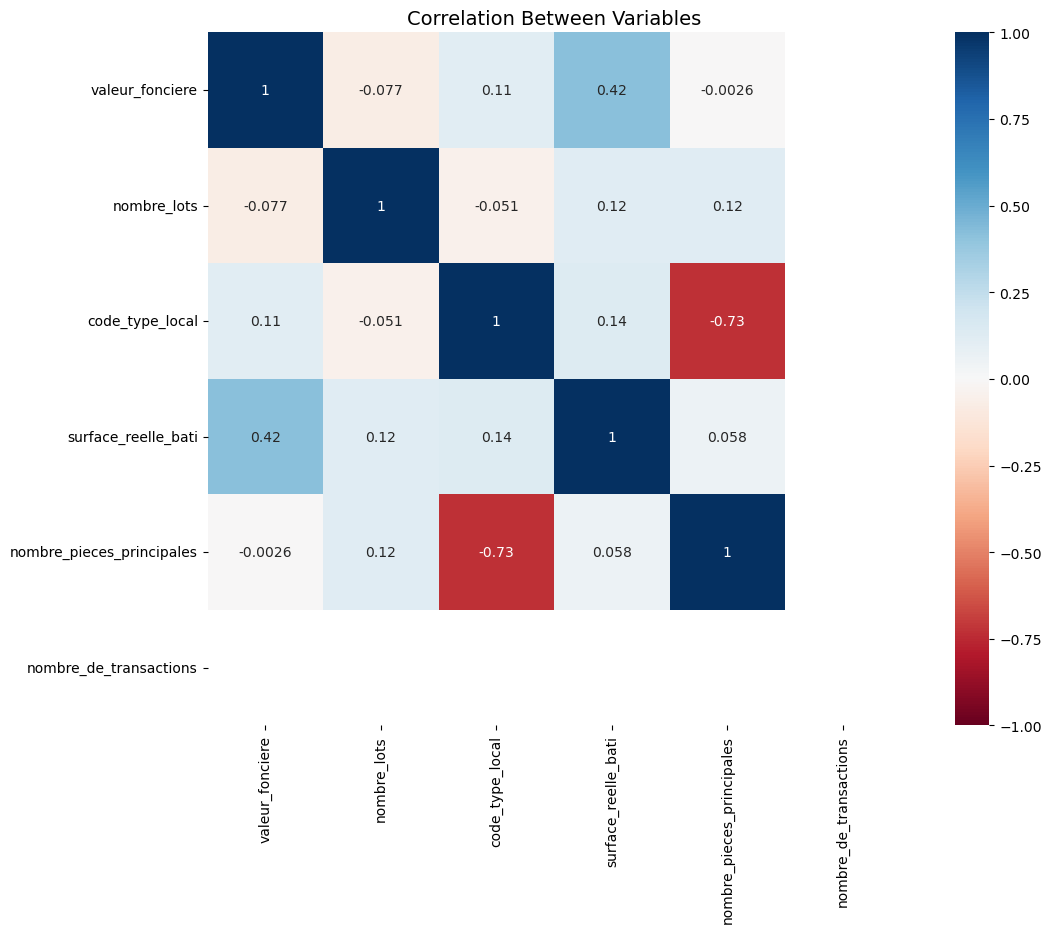

In [74]:
correlation_metrics=data_univariate.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

In [75]:
Q1 = dep['valeur_fonciere'].quantile(0.25)
Q3 = dep['valeur_fonciere'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
mini = Q1 - threshold * IQR
maxi = Q3 + threshold * IQR

In [76]:
data_univariate = data_univariate[(data_univariate['valeur_fonciere']>=mini) & (data_univariate['valeur_fonciere'] <=maxi)]

In [77]:
data_univariate.head()

,valeur_fonciere,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,nombre_de_transactions
1,567000.00,2.0,4.0,52.000000,0.0,1.0
2,140000.00,2.0,2.0,18.000000,1.0,1.0
3,400000.00,1.0,2.0,43.000000,1.0,1.0
4,141343.12,1.0,3.0,14.333333,0.0,1.0
5,295000.00,2.0,2.0,28.000000,2.0,1.0


C:\Users\test\AppData\Local\Temp\ipykernel_3892\2773413667.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\test\AppData\Local\Temp\ipykernel_3892\2773413667.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\test\AppData\Local\Temp\ipykernel_3892\2773413667.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\test\AppData\Local\Temp\ipykernel_3892\2773413667.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\test\AppData\Local\Temp\ipykernel_3892\2773413667.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


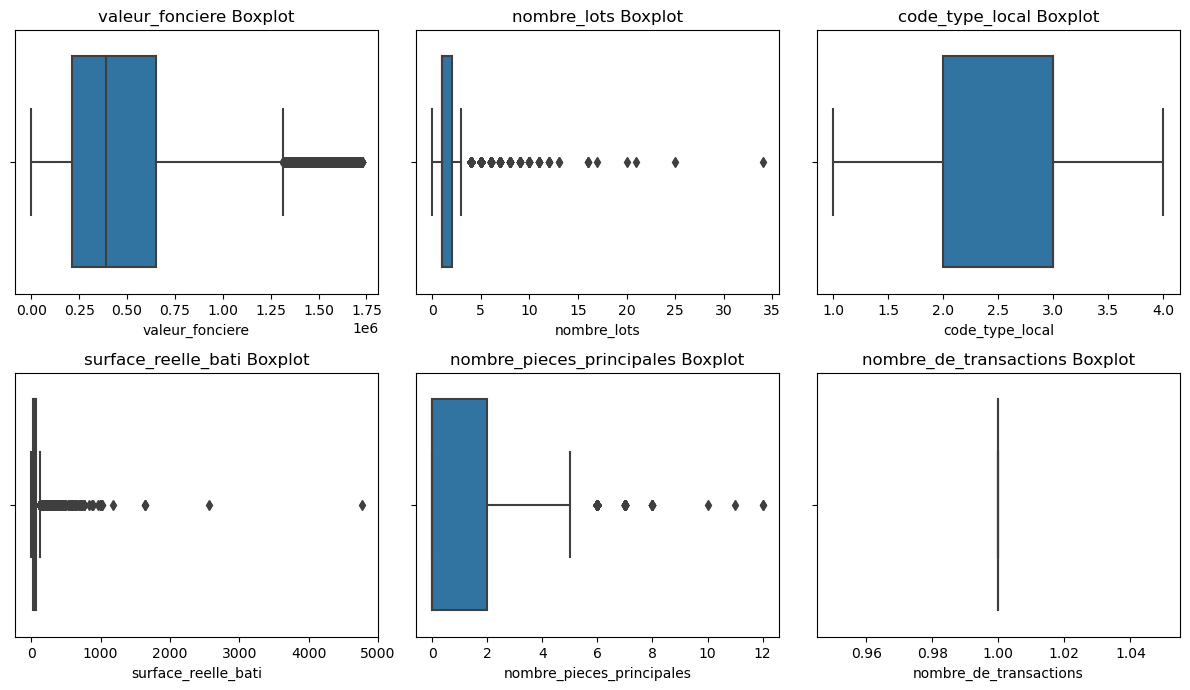

In [78]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,10))
for i, j in enumerate(data_univariate.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=data_univariate[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()
plt.show()

## **4. Modélisation supervisée**
* **Séparation des Données**

In [79]:
from sklearn.model_selection import train_test_split

# Séparer les données en ensembles d'entraînement et de test
X = data_univariate.drop(['valeur_fonciere', 'valeur_fonciere_log'], axis=1)
y = data_univariate['valeur_fonciere_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

KeyError: "['valeur_fonciere_log'] not found in axis"

* **Entrainement du model (Random Forest)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Entraîner le modèle RandomForest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Prédictions
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

# Évaluation du modèle
train_rmse_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)

print(f'Train RMSE: {train_rmse_rf}')
print(f'Test RMSE: {test_rmse_rf}')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals_test = y_test - y_pred_test_rf

# Scatter plot des prédictions vs valeurs réelles pour l'ensemble d'entraînement
plt.figure(figsize=(14, 6))

# Scatter plot des prédictions vs valeurs réelles pour l'ensemble de test
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_test_rf, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Prédictions vs Valeurs Réelles (Test)')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

plt.subplot(1, 2, 2)
sns.histplot(residuals_test, bins=30, kde=True)
plt.title('Résidus (Test)')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


* **Matrix de confusion**

### **6. Modélisation non supervisée**
* **Clustering pour Identifier les Zones à Forte Demande**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculer les inerties pour un éventail de nombres de clusters
inertias = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_init=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot de la courbe de l'inertie
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.title('Courbe de Elbow pour déterminer le nombre optimal de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.xticks(k_range)
plt.grid(True)
plt.show()

* **Application de K-Means**

In [ ]:
# Appliquer KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
data_univariate['cluster'] = kmeans.fit_predict(X)

# Afficher les clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data_univariate, x='surface_reelle_bati', y='valeur_fonciere', hue='cluster', palette='viridis')
plt.title('Clusters de Valeurs Foncières par Surface Réelle Bâtie')
plt.xlabel('Surface Réelle Bâtie (m²)')
plt.ylabel('Valeur Foncière (€)')
plt.show()

data_univariate[['cluster', 'valeur_fonciere']].head()